In [1]:
import pandas as pd

In [55]:
df = pd.read_csv("C:/Users/daum0/Downloads/카카오톡 받은 파일/주차난 프로젝트/중구 주차난 분석/car_all.csv")

In [56]:
df

,민원접수일,민원접수시간,경도,위도,_PARCEL_AD,_PARCEL_DT,_ROAD_AD,_ROAD_DT
0,20231001.0,0:00:00,126.981032,37.554950,서울특별시 중구 회현동1가 산 1-2,0.0m,서울특별시 중구 회현동1가 소파로 46,31.0m
1,20231001.0,0:00:00,126.981032,37.554950,서울특별시 중구 회현동1가 산 1-2,0.0m,서울특별시 중구 회현동1가 소파로 46,31.0m
2,20231001.0,0:00:00,126.981032,37.554950,서울특별시 중구 회현동1가 산 1-2,0.0m,서울특별시 중구 회현동1가 소파로 46,31.0m
3,20231001.0,0:00:00,126.981032,37.554950,서울특별시 중구 회현동1가 산 1-2,0.0m,서울특별시 중구 회현동1가 소파로 46,31.0m
4,20231001.0,0:00:00,126.981032,37.554950,서울특별시 중구 회현동1가 산 1-2,0.0m,서울특별시 중구 회현동1가 소파로 46,31.0m
...,...,...,...,...,...,...,...,...
134529,20231031.0,23:55:00,127.009894,37.535221,서울특별시 용산구 한남동 31-5,0.0m,서울특별시 용산구 한남대로20길 47-10,0.0m
134530,20231031.0,23:56:00,126.865180,37.534377,서울특별시 양천구 목동 786-6,0.0m,서울특별시 양천구 목동중앙서로7나길 11,0.0m
134531,20231031.0,23:59:00,127.001042,37.506165,서울특별시 서초구 잠원동 76-5,0.0m,서울특별시 서초구 반포대로 304,0.0m
134532,20231031.0,23:59:00,127.005346,37.511840,서울특별시 서초구 잠원동 71-8,0.0m,서울특별시 서초구 신반포로23길 76,0.0m


In [57]:
# 주소 나누기
df[['시', '구', '도로1', '도로2','건물번호']] = df['_ROAD_AD'].str.split(' ', expand=True)
df.head()

,민원접수일,민원접수시간,경도,위도,_PARCEL_AD,_PARCEL_DT,_ROAD_AD,_ROAD_DT,시,구,도로1,도로2,건물번호
0,20231001.0,0:00:00,126.981032,37.55495,서울특별시 중구 회현동1가 산 1-2,0.0m,서울특별시 중구 회현동1가 소파로 46,31.0m,서울특별시,중구,회현동1가,소파로,46
1,20231001.0,0:00:00,126.981032,37.55495,서울특별시 중구 회현동1가 산 1-2,0.0m,서울특별시 중구 회현동1가 소파로 46,31.0m,서울특별시,중구,회현동1가,소파로,46
2,20231001.0,0:00:00,126.981032,37.55495,서울특별시 중구 회현동1가 산 1-2,0.0m,서울특별시 중구 회현동1가 소파로 46,31.0m,서울특별시,중구,회현동1가,소파로,46
3,20231001.0,0:00:00,126.981032,37.55495,서울특별시 중구 회현동1가 산 1-2,0.0m,서울특별시 중구 회현동1가 소파로 46,31.0m,서울특별시,중구,회현동1가,소파로,46
4,20231001.0,0:00:00,126.981032,37.55495,서울특별시 중구 회현동1가 산 1-2,0.0m,서울특별시 중구 회현동1가 소파로 46,31.0m,서울특별시,중구,회현동1가,소파로,46


In [58]:
# 컬럼 지우기
df = df.drop(columns=['경도', '위도','_PARCEL_AD','_PARCEL_DT','_ROAD_AD', '_ROAD_DT', '시', '도로1', '도로2', '건물번호'])
df.head()

,민원접수일,민원접수시간,구
0,20231001.0,0:00:00,중구
1,20231001.0,0:00:00,중구
2,20231001.0,0:00:00,중구
3,20231001.0,0:00:00,중구
4,20231001.0,0:00:00,중구


In [59]:
# 평일== 0 /주말 == 1
df['요일'] = pd.to_datetime(df['민원접수일'], format='%Y%m%d').dt.dayofweek
df['평일/주말'] = df['요일'].apply(lambda x: 0 if x < 5 else 1)
df

,민원접수일,민원접수시간,구,요일,평일/주말
0,20231001.0,0:00:00,중구,6,1
1,20231001.0,0:00:00,중구,6,1
2,20231001.0,0:00:00,중구,6,1
3,20231001.0,0:00:00,중구,6,1
4,20231001.0,0:00:00,중구,6,1
...,...,...,...,...,...
134529,20231031.0,23:55:00,용산구,1,0
134530,20231031.0,23:56:00,양천구,1,0
134531,20231031.0,23:59:00,서초구,1,0
134532,20231031.0,23:59:00,서초구,1,0


In [60]:
df_junggu = df[df['구'] == '중구']
df_junggu

,민원접수일,민원접수시간,구,요일,평일/주말
0,20231001.0,0:00:00,중구,6,1
1,20231001.0,0:00:00,중구,6,1
2,20231001.0,0:00:00,중구,6,1
3,20231001.0,0:00:00,중구,6,1
4,20231001.0,0:00:00,중구,6,1
...,...,...,...,...,...
134414,20231031.0,23:03:00,중구,1,0
134454,20231031.0,23:19:00,중구,1,0
134462,20231031.0,23:20:00,중구,1,0
134517,20231031.0,23:44:00,중구,1,0


In [61]:
def adjust_to_20_minutes(time):
    parts = time.split(':')
    hour = parts[0].zfill(2)
    minute = parts[1]
    second = parts[2]
    minute_adjusted = str(int(minute) // 20 * 20).zfill(2)  # 20분 간격으로 조정
    return f"{hour}:{minute_adjusted}:{second}"

# 시간 열을 20분 간격으로 조정하여 새로운 컬럼에 할당
df_junggu['시간'] = df_junggu['민원접수시간'].apply(adjust_to_20_minutes)

df_junggu

,민원접수일,민원접수시간,구,요일,평일/주말,시간
0,20231001.0,0:00:00,중구,6,1,00:00:00
1,20231001.0,0:00:00,중구,6,1,00:00:00
2,20231001.0,0:00:00,중구,6,1,00:00:00
3,20231001.0,0:00:00,중구,6,1,00:00:00
4,20231001.0,0:00:00,중구,6,1,00:00:00
...,...,...,...,...,...,...
134414,20231031.0,23:03:00,중구,1,0,23:00:00
134454,20231031.0,23:19:00,중구,1,0,23:00:00
134462,20231031.0,23:20:00,중구,1,0,23:20:00
134517,20231031.0,23:44:00,중구,1,0,23:40:00


In [62]:
df_junggu['민원접수일'] = df_junggu['민원접수일'].astype(int).astype(str)

df_junggu['민원접수일'] = pd.to_datetime(df_junggu['민원접수일'], format='%Y%m%d')
df_junggu

,민원접수일,민원접수시간,구,요일,평일/주말,시간
0,2023-10-01,0:00:00,중구,6,1,00:00:00
1,2023-10-01,0:00:00,중구,6,1,00:00:00
2,2023-10-01,0:00:00,중구,6,1,00:00:00
3,2023-10-01,0:00:00,중구,6,1,00:00:00
4,2023-10-01,0:00:00,중구,6,1,00:00:00
...,...,...,...,...,...,...
134414,2023-10-31,23:03:00,중구,1,0,23:00:00
134454,2023-10-31,23:19:00,중구,1,0,23:00:00
134462,2023-10-31,23:20:00,중구,1,0,23:20:00
134517,2023-10-31,23:44:00,중구,1,0,23:40:00


In [63]:
holidays = ['20231002', '20231003', '20231009']

for holiday in holidays:
    df_junggu.loc[df_junggu['민원접수일'] == holiday, '평일/주말'] = 1

In [64]:
df_junggu

,민원접수일,민원접수시간,구,요일,평일/주말,시간
0,2023-10-01,0:00:00,중구,6,1,00:00:00
1,2023-10-01,0:00:00,중구,6,1,00:00:00
2,2023-10-01,0:00:00,중구,6,1,00:00:00
3,2023-10-01,0:00:00,중구,6,1,00:00:00
4,2023-10-01,0:00:00,중구,6,1,00:00:00
...,...,...,...,...,...,...
134414,2023-10-31,23:03:00,중구,1,0,23:00:00
134454,2023-10-31,23:19:00,중구,1,0,23:00:00
134462,2023-10-31,23:20:00,중구,1,0,23:20:00
134517,2023-10-31,23:44:00,중구,1,0,23:40:00


In [65]:
# 평일== 0 /주말 == 1
df_week = df_junggu[(df_junggu['평일/주말'] == 0)]
df_hol = df_junggu[(df_junggu['평일/주말'] == 1)]

In [66]:
df_hol_group = df_hol.groupby('시간')['민원접수시간'].size().reset_index(name='건수')
df_week_group = df_week.groupby('시간')['민원접수시간'].size().reset_index(name='건수')
df_junggu_all = df_junggu.groupby('시간')['민원접수시간'].size().reset_index(name='건수')

In [67]:
df_hol_group

,시간,건수
0,00:00:00,442
1,00:20:00,354
2,00:40:00,286
3,01:00:00,275
4,01:20:00,283
...,...,...
64,22:20:00,177
65,22:40:00,198
66,23:00:00,230
67,23:20:00,281


In [25]:
df_week_group 

,시간,건수
0,00:00:00,44
1,00:20:00,36
2,00:40:00,21
3,01:00:00,28
4,01:20:00,7
...,...,...
66,22:20:00,41
67,22:40:00,51
68,23:00:00,70
69,23:20:00,20


In [26]:
df_junggu_all

,시간,건수
0,00:00:00,486
1,00:20:00,390
2,00:40:00,307
3,01:00:00,303
4,01:20:00,290
...,...,...
67,22:20:00,218
68,22:40:00,249
69,23:00:00,300
70,23:20:00,301


In [68]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 한글 깨짐
plt.rcParams['font.family'] = 'Gulim'

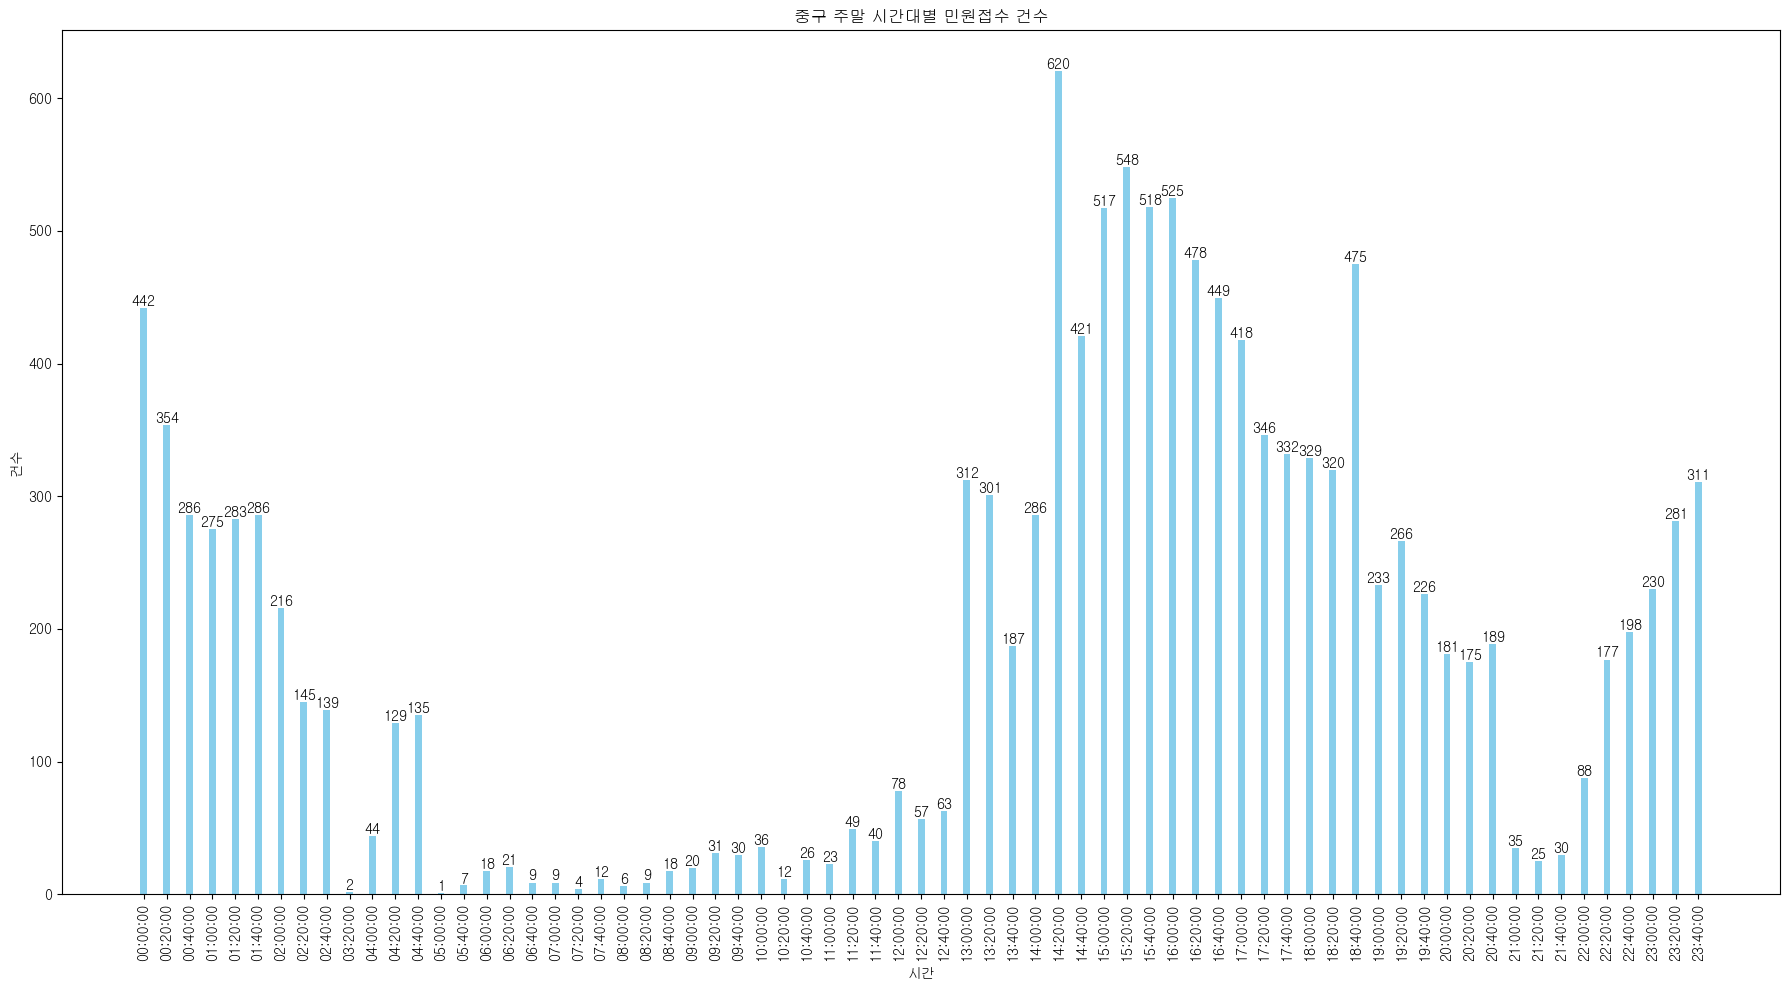

In [69]:
# 주말 시간대

plt.figure(figsize=(18, 10))
bars = plt.bar(df_hol_group['시간'], df_hol_group['건수'], color='skyblue', width= 0.3)
plt.xlabel('시간')
plt.ylabel('건수')
plt.title('중구 주말 시간대별 민원접수 건수')
plt.xticks(rotation=90)
plt.tight_layout()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2),ha='center', va='bottom')

plt.show()

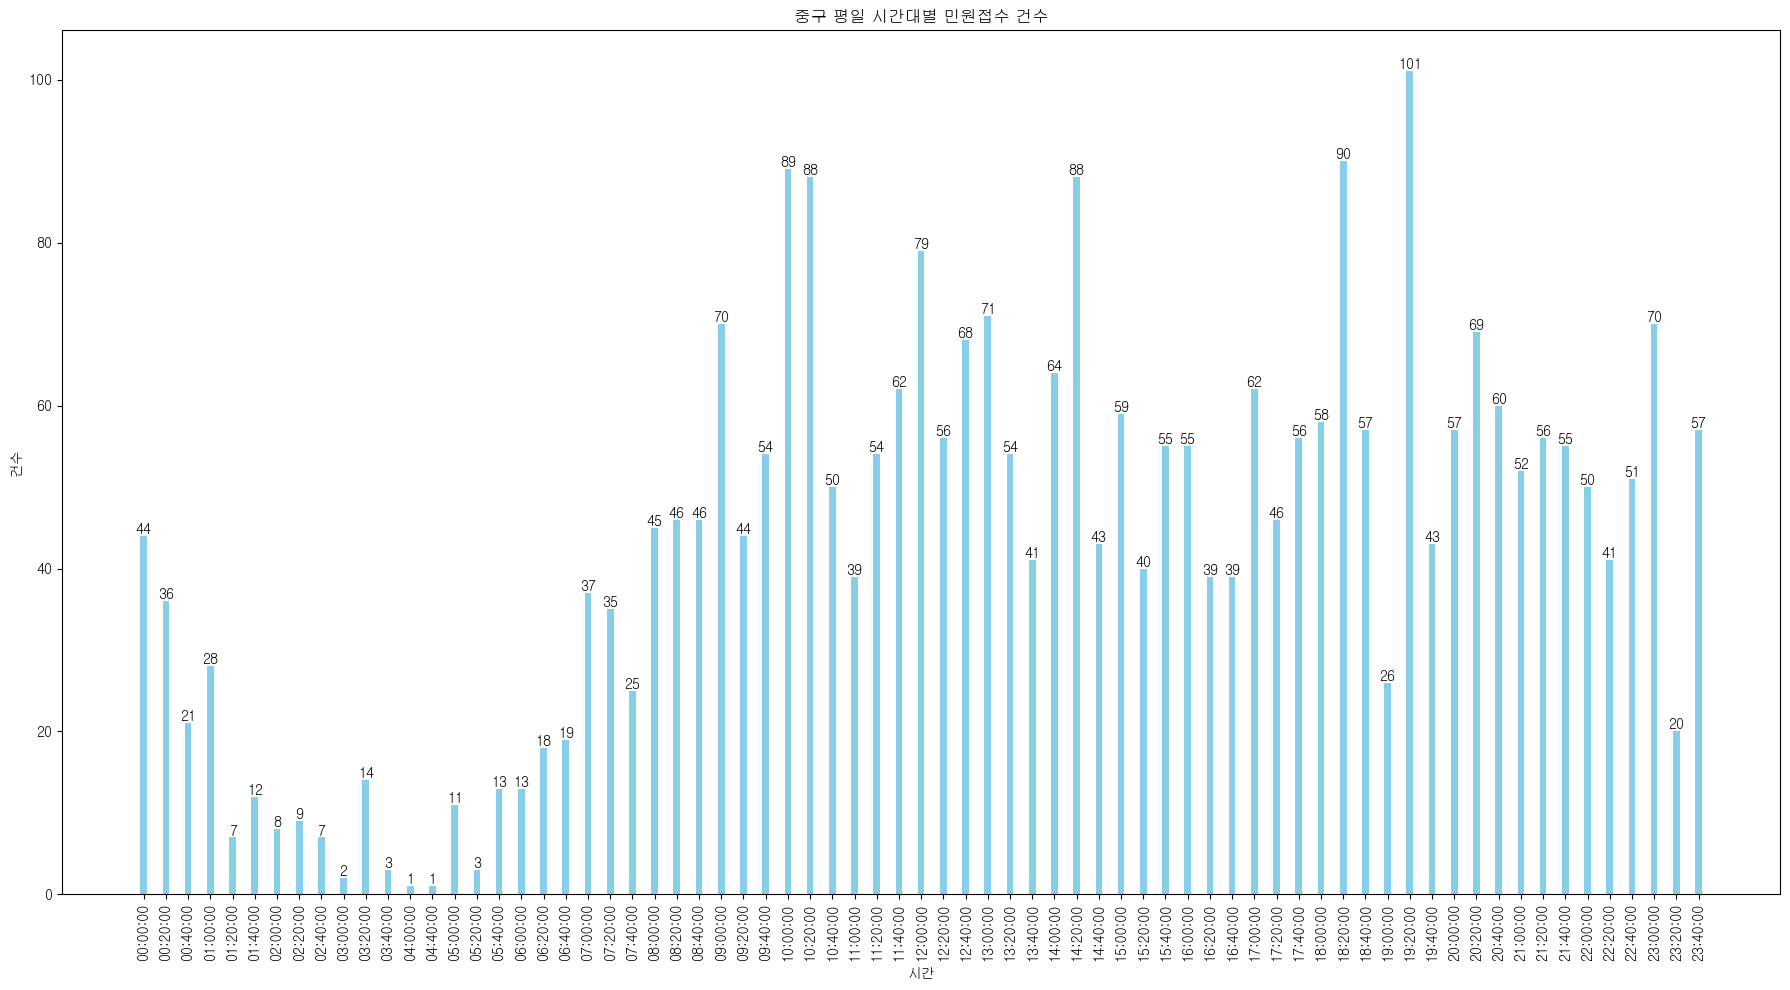

In [70]:
# 평일 시간대

plt.figure(figsize=(18, 10))
bars = plt.bar(df_week_group['시간'], df_week_group['건수'], color='skyblue', width= 0.3)
plt.xlabel('시간')
plt.ylabel('건수')
plt.title('중구 평일 시간대별 민원접수 건수')
plt.xticks(rotation=90)
plt.tight_layout()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2),ha='center', va='bottom')

plt.show()

# 2번

In [124]:
live = pd.read_csv("C:/Users/daum0/Downloads/카카오톡 받은 파일/주차난 프로젝트/중구 주차난 분석/merged_data.csv")
live.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15624 entries, 0 to 15623
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   주차장명       15624 non-null  object
 1   주소         15624 non-null  object
 2   총 주차면      15624 non-null  int64 
 3   현재 주차 차량수  15624 non-null  int64 
 4   날짜         15624 non-null  object
 5   시간         15624 non-null  object
 6   요일         15624 non-null  object
dtypes: int64(2), object(5)
memory usage: 854.6+ KB


In [125]:
# 주말 여부를 나타내는 새로운 열 추가 
live['평일/주말'] = live['요일'].apply(lambda x: '0' if x in ['월요일', '화요일', '수요일', '목요일', '금요일'] else '1')
live

,주차장명,주소,총 주차면,현재 주차 차량수,날짜,시간,요일,평일/주말
0,DDP동측(양쪽) 관광버스전용 주차장(시),중구 을지로7가 2-36,20,12,2024-2-13,0:0,화요일,0
1,DDP북측 마장로 관광버스전용 주차장(시),중구 신당동 222-3,4,2,2024-2-13,0:0,화요일,0
2,남대문 시장 관광버스전용 주차장(시),중구 남창동 51-4,2,3,2024-2-13,0:0,화요일,0
3,남대문 초입 관광버스전용 주차장(시),중구 남창동 282-10,3,3,2024-2-13,0:0,화요일,0
4,남대문 화물 공영주차장(시),중구 남대문로4가 24-1,9,3,2024-2-13,0:0,화요일,0
...,...,...,...,...,...,...,...,...
15619,청계5가 공영주차장(시),중구 을지로6가 17-442 0,20,30,2024-2-19,23:40,월요일,0
15620,청계6(동평화) 공영주차장(시),중구 신당동 217-91 0,6,6,2024-2-19,23:40,월요일,0
15621,청계6(신평화시장앞) 공영주차장(시),중구 신당동 217-91 0,7,8,2024-2-19,23:40,월요일,0
15622,청계6(청평화) 공영주차장(시),중구 신당동 217-91 0,5,4,2024-2-19,23:40,월요일,0


In [126]:
# 컬럼지우기
live = live.drop(columns= ['주차장명', '주소','총 주차면','날짜','요일'])
live.head()

,현재 주차 차량수,시간,평일/주말
0,12,0:0,0
1,2,0:0,0
2,3,0:0,0
3,3,0:0,0
4,3,0:0,0


In [127]:
def convert_to_hh_mm(time):
    hour, minute = time.split(':')
    return '{:02d}:{:02s}'.format(int(hour), minute)

def add_seconds(time):
    return time + ':00'

# 시간 열을 변환하고 :00 추가하여 새로운 컬럼에 할당
live['시간'] = live['시간'].apply(convert_to_hh_mm)
live['시간'] = live['시간'].apply(add_seconds)
live

,현재 주차 차량수,시간,평일/주말
0,12,00:00:00,0
1,2,00:00:00,0
2,3,00:00:00,0
3,3,00:00:00,0
4,3,00:00:00,0
...,...,...,...
15619,30,23:40:00,0
15620,6,23:40:00,0
15621,8,23:40:00,0
15622,4,23:40:00,0


In [134]:
live.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15624 entries, 0 to 15623
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   현재 주차 차량수  15624 non-null  int64 
 1   시간         15624 non-null  object
 2   평일/주말      15624 non-null  object
dtypes: int64(1), object(2)
memory usage: 366.3+ KB


In [135]:
# 평일== 0 /주말 == 1
live_week = live[(live['평일/주말'] == "0")]
live_hol = live[(live['평일/주말'] == "1")]

In [136]:
live_hol_group = live_hol.groupby('시간')['현재 주차 차량수'].sum().reset_index(name='주차수')
live_week_group = live_week.groupby('시간')['현재 주차 차량수'].sum().reset_index(name='주차수')
live_junggu_all = live.groupby('시간')['현재 주차 차량수'].sum().reset_index(name='주차수')

In [137]:
live_hol_group

,시간,주차수
0,00:00:00,1218
1,00:20:00,1295
2,00:40:00,1254
3,01:00:00,1194
4,01:20:00,1228
...,...,...
67,22:20:00,1958
68,22:40:00,2023
69,23:00:00,2034
70,23:20:00,2014


In [138]:
live_week_group

,시간,주차수
0,00:00:00,6511
1,00:20:00,6484
2,00:40:00,6440
3,01:00:00,6105
4,01:20:00,6172
...,...,...
67,22:20:00,6636
68,22:40:00,6707
69,23:00:00,6764
70,23:20:00,6825


In [139]:
live_junggu_all

,시간,주차수
0,00:00:00,7729
1,00:20:00,7779
2,00:40:00,7694
3,01:00:00,7299
4,01:20:00,7400
...,...,...
67,22:20:00,8594
68,22:40:00,8730
69,23:00:00,8798
70,23:20:00,8839


In [ ]:
# 신고 건수
df_hol_group 
df_week_group 
df_junggu_all


# 라이브
live_hol_group
live_week_group
live_junggu_all

In [157]:
# 불법신고 주말 건수 정규화

scaler = MinMaxScaler()
columns_to_normalize = ['건수']

# Min-Max 스케일링 적용
df_hol_group[columns_to_normalize] = scaler.fit_transform(df_hol_group[columns_to_normalize])

df_hol_group

,시간,건수
0,00:00:00,0.712439
1,00:20:00,0.570275
2,00:40:00,0.460420
3,01:00:00,0.442649
4,01:20:00,0.455574
...,...,...
64,22:20:00,0.284330
65,22:40:00,0.318255
66,23:00:00,0.369952
67,23:20:00,0.452342


In [158]:
# 주차장데이터 주말 건수 정규화

scaler = MinMaxScaler()
columns_to_normalize = ['주차수']

# Min-Max 스케일링 적용
live_hol_group[columns_to_normalize] = scaler.fit_transform(live_hol_group[columns_to_normalize])

live_hol_group

,시간,주차수
0,00:00:00,0.103297
1,00:20:00,0.187912
2,00:40:00,0.142857
3,01:00:00,0.076923
4,01:20:00,0.114286
...,...,...
67,22:20:00,0.916484
68,22:40:00,0.987912
69,23:00:00,1.000000
70,23:20:00,0.978022


In [159]:
merged_df_hol = pd.merge(live_hol_group, df_hol_group, on='시간', how='inner')
merged_df_hol

,시간,주차수,건수
0,00:00:00,0.103297,0.712439
1,00:20:00,0.187912,0.570275
2,00:40:00,0.142857,0.460420
3,01:00:00,0.076923,0.442649
4,01:20:00,0.114286,0.455574
...,...,...,...
64,22:20:00,0.916484,0.284330
65,22:40:00,0.987912,0.318255
66,23:00:00,1.000000,0.369952
67,23:20:00,0.978022,0.452342


In [160]:
merged_df_hol.corr()

,주차수,건수
주차수,1.000000,0.234963
건수,0.234963,1.000000


In [152]:
# 주말
merged_df_hol = pd.merge(live_hol_group, df_hol_group, on='시간', how='inner')

scaler = MinMaxScaler()
columns_to_normalize = ['건수', '주차수']

# Min-Max 스케일링 적용
merged_df_hol[columns_to_normalize] = scaler.fit_transform(merged_df_hol[columns_to_normalize])


merged_df_hol.corr()

,주차수,건수
주차수,1.000000,0.234963
건수,0.234963,1.000000


In [153]:
# 평일
merged_df_week = pd.merge(df_week_group, live_week_group, on='시간', how='inner')


scaler = MinMaxScaler()
columns_to_normalize = ['건수', '주차수']

# Min-Max 스케일링 적용
merged_df_week[columns_to_normalize] = scaler.fit_transform(merged_df_week[columns_to_normalize])


merged_df_week.corr()

,건수,주차수
건수,1.000000,0.359538
주차수,0.359538,1.000000


In [154]:
# 전체

merged_df = pd.merge(df_junggu_all, live_junggu_all, on='시간', how='inner')

scaler = MinMaxScaler()
columns_to_normalize = ['건수', '주차수']

# Min-Max 스케일링 적용
merged_df[columns_to_normalize] = scaler.fit_transform(merged_df[columns_to_normalize])


merged_df.corr()

,건수,주차수
건수,1.000000,0.387147
주차수,0.387147,1.000000


In [145]:
from sklearn.preprocessing import MinMaxScaler